In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

#phase2 libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
df=pd.read_csv('/content/loan_train.csv')

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [4]:
df.shape

(346, 10)

## Exploratory Data Analysis

In [5]:
df.dtypes

Unnamed: 0.1       int64
Unnamed: 0         int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [6]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [7]:
df.isnull().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [8]:
label_encoder = LabelEncoder()
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df['education'] = label_encoder.fit_transform(df['education'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [9]:
df.dtypes

loan_status        int64
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education          int64
Gender             int64
dtype: object

In [10]:
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,9/8/2016,10/7/2016,45,1,1
1,1,1000,30,9/8/2016,10/7/2016,33,0,0
2,1,1000,15,9/8/2016,9/22/2016,27,3,1
3,1,1000,30,9/9/2016,10/8/2016,28,3,0
4,1,1000,30,9/9/2016,10/8/2016,29,3,1
...,...,...,...,...,...,...,...,...
341,0,800,15,9/11/2016,9/25/2016,32,1,1
342,0,1000,30,9/11/2016,10/10/2016,25,1,1
343,0,800,15,9/12/2016,9/26/2016,39,3,1
344,0,1000,30,9/12/2016,11/10/2016,28,3,1


<Axes: xlabel='Principal', ylabel='Density'>

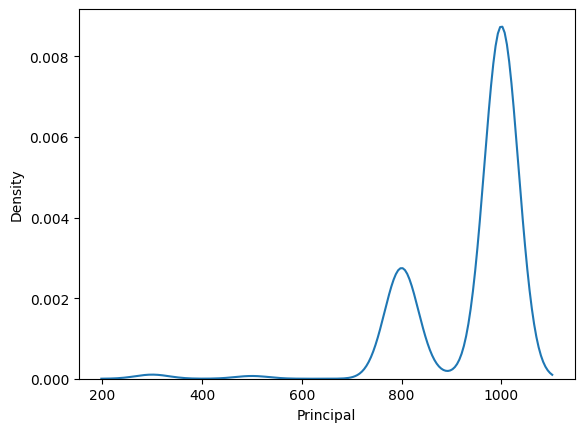

In [ ]:

sns.kdeplot(df['Principal'])

<Axes: xlabel='age', ylabel='Count'>

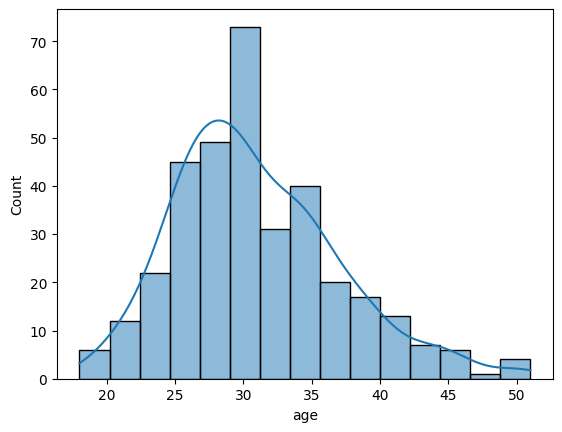

In [ ]:
sns.histplot(df['age'],kde=True)

<Axes: xlabel='terms', ylabel='Count'>

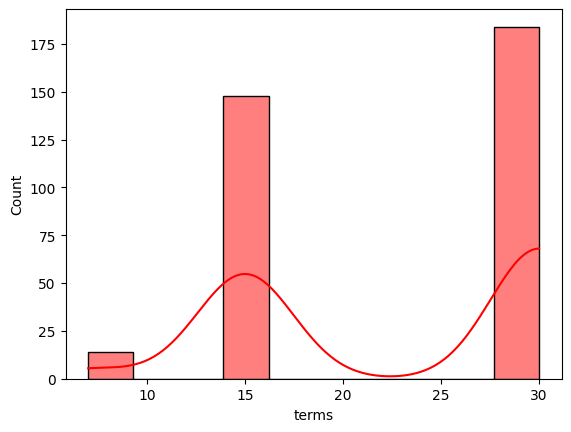

In [ ]:
sns.histplot(df['terms'],kde=True, color = 'red')

In [ ]:
df['loan_status'].value_counts()

loan_status
1    260
0     86
Name: count, dtype: int64

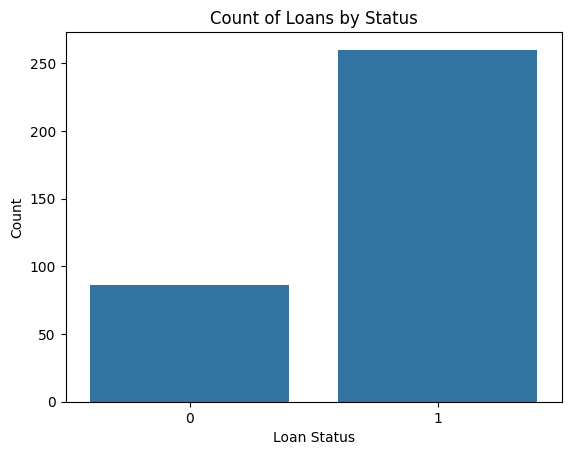

In [ ]:

sns.countplot(x='loan_status', data=df)
plt.title('Count of Loans by Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


## Feature Engineering

In [11]:
df['effective_date'] = pd.to_datetime(df['effective_date'], format='%m/%d/%Y')
df['due_date'] = pd.to_datetime(df['due_date'], format='%m/%d/%Y')

In [12]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,2016-09-08,2016-10-07,45,1,1
1,1,1000,30,2016-09-08,2016-10-07,33,0,0
2,1,1000,15,2016-09-08,2016-09-22,27,3,1
3,1,1000,30,2016-09-09,2016-10-08,28,3,0
4,1,1000,30,2016-09-09,2016-10-08,29,3,1


In [13]:

df['effective_year'] = df['effective_date'].dt.year
df['effective_month'] = df['effective_date'].dt.month
df['effective_day'] = df['effective_date'].dt.day

df['due_year'] = df['due_date'].dt.year
df['due_month'] = df['due_date'].dt.month
df['due_day'] = df['due_date'].dt.day

In [14]:
df.drop(columns=['effective_date', 'due_date'], inplace=True)
df.head()

,loan_status,Principal,terms,age,education,Gender,effective_year,effective_month,effective_day,due_year,due_month,due_day
0,1,1000,30,45,1,1,2016,9,8,2016,10,7
1,1,1000,30,33,0,0,2016,9,8,2016,10,7
2,1,1000,15,27,3,1,2016,9,8,2016,9,22
3,1,1000,30,28,3,0,2016,9,9,2016,10,8
4,1,1000,30,29,3,1,2016,9,9,2016,10,8


In [15]:
df['effective_year'].nunique()

1

In [16]:
df['due_year'].nunique()

1

In [17]:
df.drop(columns=['effective_year', 'due_year'], inplace=True)
df.head()

,loan_status,Principal,terms,age,education,Gender,effective_month,effective_day,due_month,due_day
0,1,1000,30,45,1,1,9,8,10,7
1,1,1000,30,33,0,0,9,8,10,7
2,1,1000,15,27,3,1,9,8,9,22
3,1,1000,30,28,3,0,9,9,10,8
4,1,1000,30,29,3,1,9,9,10,8


In [18]:
df.dtypes

loan_status        int64
Principal          int64
terms              int64
age                int64
education          int64
Gender             int64
effective_month    int32
effective_day      int32
due_month          int32
due_day            int32
dtype: object

In [19]:
df['loan_duration_days'] = abs(df['due_day'] - df['effective_day'])
df.head()

,loan_status,Principal,terms,age,education,Gender,effective_month,effective_day,due_month,due_day,loan_duration_days
0,1,1000,30,45,1,1,9,8,10,7,1
1,1,1000,30,33,0,0,9,8,10,7,1
2,1,1000,15,27,3,1,9,8,9,22,14
3,1,1000,30,28,3,0,9,9,10,8,1
4,1,1000,30,29,3,1,9,9,10,8,1


In [20]:
df['total_loan_amount'] = df['Principal'] * df['terms']
df.head()

,loan_status,Principal,terms,age,education,Gender,effective_month,effective_day,due_month,due_day,loan_duration_days,total_loan_amount
0,1,1000,30,45,1,1,9,8,10,7,1,30000
1,1,1000,30,33,0,0,9,8,10,7,1,30000
2,1,1000,15,27,3,1,9,8,9,22,14,15000
3,1,1000,30,28,3,0,9,9,10,8,1,30000
4,1,1000,30,29,3,1,9,9,10,8,1,30000


# Models

**Balancing data using random over Sampling**

In [21]:

X = df.drop('loan_status', axis=1)
y = df['loan_status']

rus = RandomOverSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

y_resampled.value_counts()

loan_status
1    260
0    260
Name: count, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:


scaler = StandardScaler()

for col in X.columns:
    if col  in ['Principal','terms','age','loan_duration_days','total_loan_amount']:
        X_train[col] = scaler.fit_transform(X_train[[col]])
        X_test[col] = scaler.transform(X_test[[col]])


In [ ]:


naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)



GaussianNB()

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)


SVC()

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:

naive_bayes_pred = naive_bayes_classifier.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
print("Naïve Bayes Classifier Accuracy:", naive_bayes_accuracy)


Naïve Bayes Classifier Accuracy: 0.7115384615384616


In [ ]:

knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Classifier Accuracy:", knn_accuracy)

KNN Classifier Accuracy: 0.7596153846153846


In [ ]:

svm_accuracy = accuracy_score(y_test, svm_classifier.predict(X_test))
print("SVM Classifier Accuracy:", svm_accuracy)


SVM Classifier Accuracy: 0.6442307692307693


In [ ]:

dt_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test))
print("Decision Tree Classifier Accuracy:", dt_accuracy)


Decision Tree Classifier Accuracy: 0.8173076923076923


# **Tuning Hyerparameters**


Grid Search for Naïve Bayes Classifier


In [ ]:


naive_bayes_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]]
}

naive_bayes_classifier = GaussianNB()

naive_bayes_grid_search = GridSearchCV(estimator=naive_bayes_classifier, param_grid=naive_bayes_param_grid, cv=5)
naive_bayes_grid_search.fit(X_train, y_train)

best_naive_bayes_classifier = naive_bayes_grid_search.best_estimator_

naive_bayes_pred = best_naive_bayes_classifier.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
print("Best Naïve Bayes Classifier Accuracy:", naive_bayes_accuracy)


Best Naïve Bayes Classifier Accuracy: 0.7211538461538461


In [ ]:
best_naive_bayes_classifier.get_params()

{'priors': [0.7, 0.3], 'var_smoothing': 1e-09}

**Naive Bayes Accuracy with Changing priors**

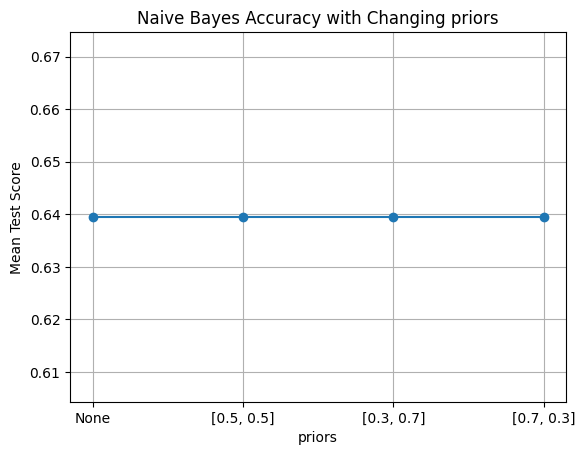

In [ ]:
results = naive_bayes_grid_search.cv_results_
priors_values = [str(prior) for prior in naive_bayes_param_grid['priors']]
mean_test_scores = results['mean_test_score'][:len(priors_values)]
plt.figure()
plt.plot(priors_values, mean_test_scores, marker='o')
plt.xlabel('priors')
plt.ylabel('Mean Test Score')
plt.title('Naive Bayes Accuracy with Changing priors')
plt.grid(True)
plt.show()


**Naiive Bayes Accuracy with Changing var_smoothing**

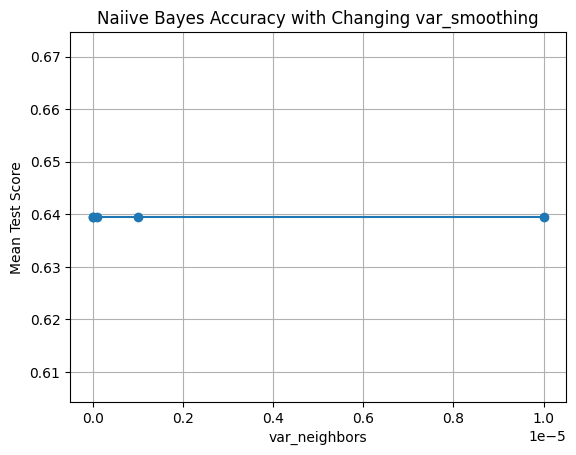

In [ ]:

results = naive_bayes_grid_search.cv_results_
n_neighbors_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(n_neighbors_values, mean_test_scores[:len(n_neighbors_values)], marker='o')
plt.xlabel('var_neighbors')
plt.ylabel('Mean Test Score')
plt.title('Naiive Bayes Accuracy with Changing var_smoothing')
plt.grid(True)
plt.show()


**Grid Search for KNN Classifier**

In [ ]:

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn_classifier = KNeighborsClassifier()

knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

best_knn_classifier = knn_grid_search.best_estimator_

knn_pred = best_knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Best KNN Classifier Accuracy:", knn_accuracy)


Best KNN Classifier Accuracy: 0.8269230769230769


In [ ]:
best_knn_classifier.get_params()

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'distance'}

**KNN Accuracy with Changing Weights**



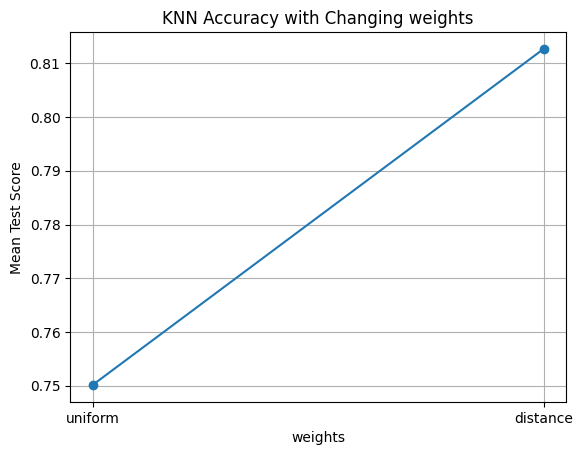

In [ ]:

results = knn_grid_search.cv_results_
n_neighbors_values =['uniform', 'distance']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(n_neighbors_values, mean_test_scores[:len(n_neighbors_values)], marker='o')
plt.xlabel('weights')
plt.ylabel('Mean Test Score')
plt.title('KNN Accuracy with Changing weights')
plt.grid(True)
plt.show()

**KNN Accuracy with Changing Algorithm**

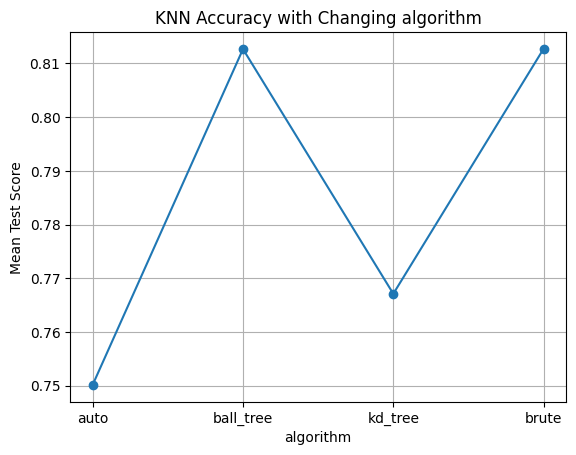

In [ ]:

results = knn_grid_search.cv_results_
n_neighbors_values =['auto', 'ball_tree', 'kd_tree', 'brute']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(n_neighbors_values, mean_test_scores[:len(n_neighbors_values)], marker='o')
plt.xlabel('algorithm')
plt.ylabel('Mean Test Score')
plt.title('KNN Accuracy with Changing algorithm')
plt.grid(True)
plt.show()

**KNN Accuracy with Changing n_neighbors**

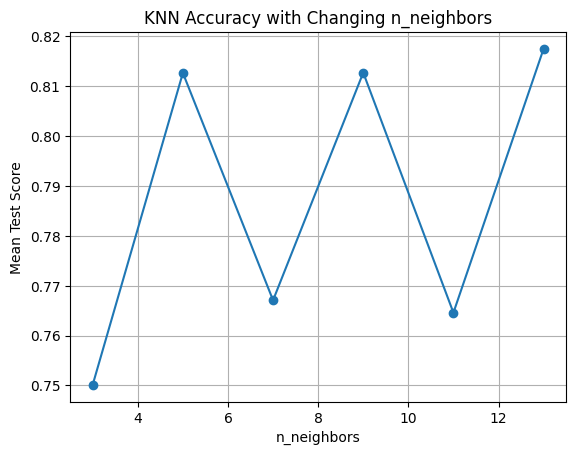

In [ ]:

results = knn_grid_search.cv_results_
n_neighbors_values = [3, 5, 7, 9, 11, 13]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(n_neighbors_values, mean_test_scores[:len(n_neighbors_values)], marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.title('KNN Accuracy with Changing n_neighbors')
plt.grid(True)
plt.show()

**Grid searsh for svm**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}


svm_random_search = RandomizedSearchCV(estimator=SVC(), param_distributions=svm_param_grid, n_iter=10, cv=5, random_state=42)
svm_random_search.fit(X_train, y_train)

best_svm_model = svm_random_search.best_estimator_


svm_accuracy = accuracy_score(y_test, best_svm_model.predict(X_test))
print("Best SVM Classifier Accuracy:", svm_accuracy)


Best SVM Classifier Accuracy: 0.7115384615384616


In [ ]:
best_svm_model.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

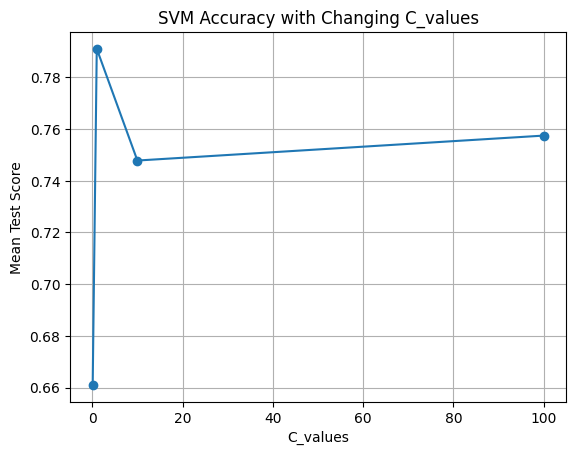

In [ ]:
results = svm_random_search.cv_results_
C_values = [0.1, 1, 10, 100]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(C_values, mean_test_scores[:len(C_values)], marker='o')
plt.xlabel('C_values')
plt.ylabel('Mean Test Score')
plt.title('SVM Accuracy with Changing C_values')
plt.grid(True)
plt.show()

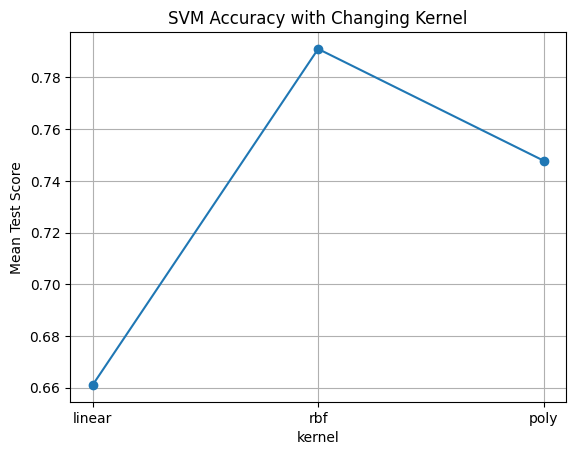

In [ ]:
results = svm_random_search.cv_results_
kernel = ['linear', 'rbf', 'poly']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(kernel, mean_test_scores[:len(kernel)], marker='o')
plt.xlabel('kernel')
plt.ylabel('Mean Test Score')
plt.title('SVM Accuracy with Changing Kernel')
plt.grid(True)
plt.show()

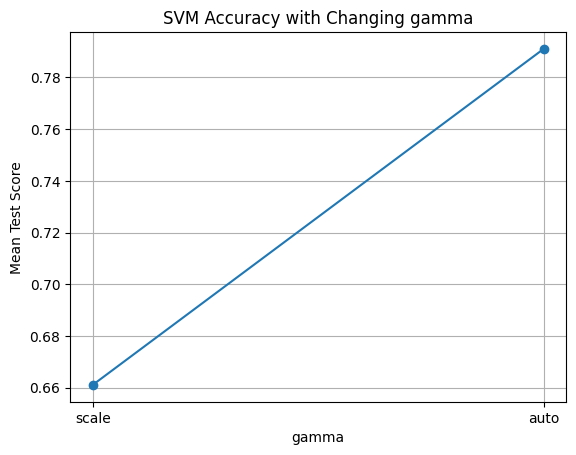

In [ ]:
results = svm_random_search.cv_results_
gamma = ['scale', 'auto']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(gamma, mean_test_scores[:len(gamma)], marker='o')
plt.xlabel('gamma')
plt.ylabel('Mean Test Score')
plt.title('SVM Accuracy with Changing gamma')
plt.grid(True)
plt.show()


**Grid search for decission tree**

In [ ]:

decision_tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), decision_tree_param_grid, cv=5, scoring='accuracy')
decision_tree_grid_search.fit(X_train, y_train)


best_decision_tree_model = decision_tree_grid_search.best_estimator_

decision_tree_accuracy = accuracy_score(y_test, best_decision_tree_model.predict(X_test))
print("Best Decision Tree Classifier Accuracy:", decision_tree_accuracy)





Best Decision Tree Classifier Accuracy: 0.8269230769230769


In [ ]:
 best_decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

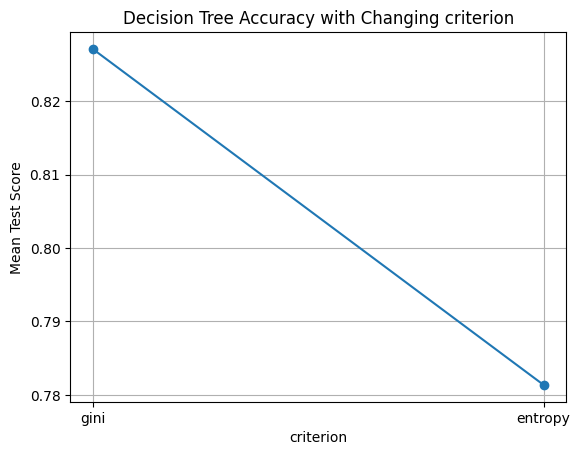

In [ ]:

results = decision_tree_grid_search.cv_results_
criterion = ['gini', 'entropy']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(criterion, mean_test_scores[:len(criterion)], marker='o')
plt.xlabel('criterion')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing criterion')
plt.grid(True)
plt.show()

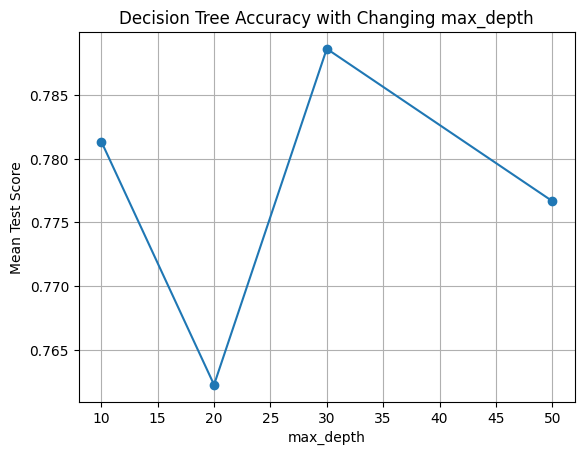

In [ ]:
results = decision_tree_grid_search.cv_results_
max_depth = [None, 10, 20, 30, 50]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(max_depth, mean_test_scores[:len(max_depth)], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing max_depth')
plt.grid(True)
plt.show()

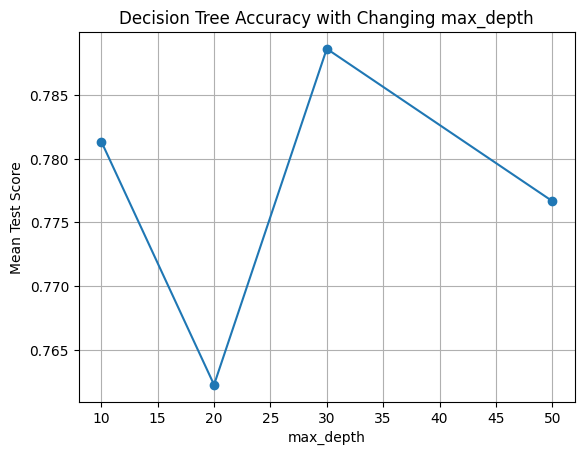

In [ ]:
results = decision_tree_grid_search.cv_results_
max_depth = [None, 10, 20, 30, 50]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(max_depth, mean_test_scores[:len(max_depth)], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing max_depth')
plt.grid(True)
plt.show()


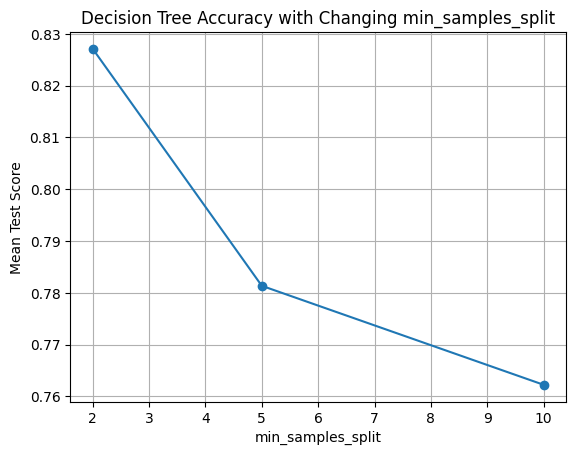

In [ ]:
results = decision_tree_grid_search.cv_results_
min_samples_split = [2, 5, 10]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(min_samples_split, mean_test_scores[:len(min_samples_split)], marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing min_samples_split')
plt.grid(True)
plt.show()

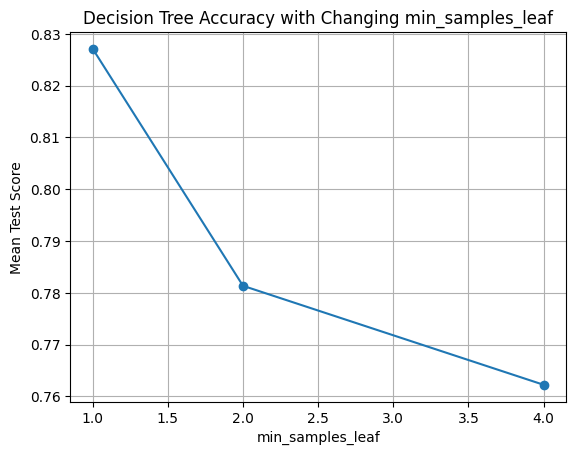

In [ ]:
results = decision_tree_grid_search.cv_results_
min_samples_leaf = [1, 2, 4]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(min_samples_leaf, mean_test_scores[:len(min_samples_leaf)], marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing min_samples_leaf')
plt.grid(True)
plt.show()

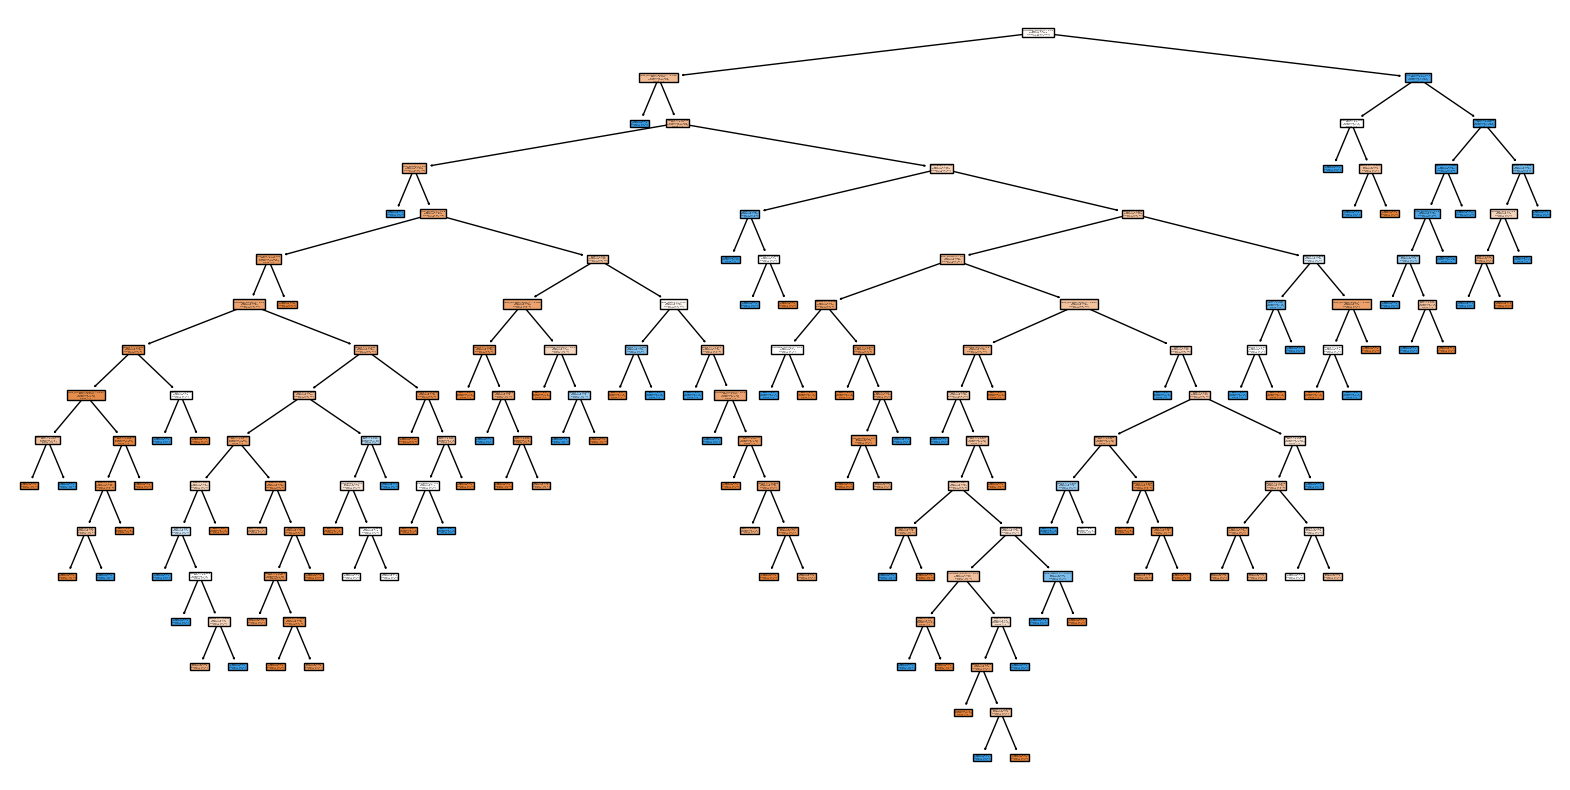

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = best_decision_tree_model

feature_names = df.columns[:-1]
class_names = df['loan_status'].astype(str).unique()

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

**Visualization of Confusion Matrices**

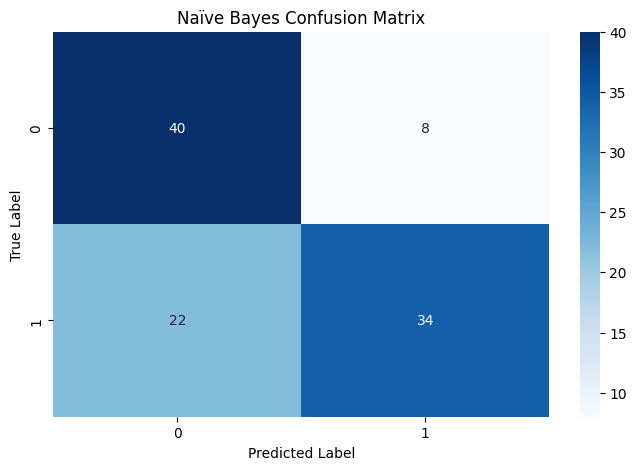

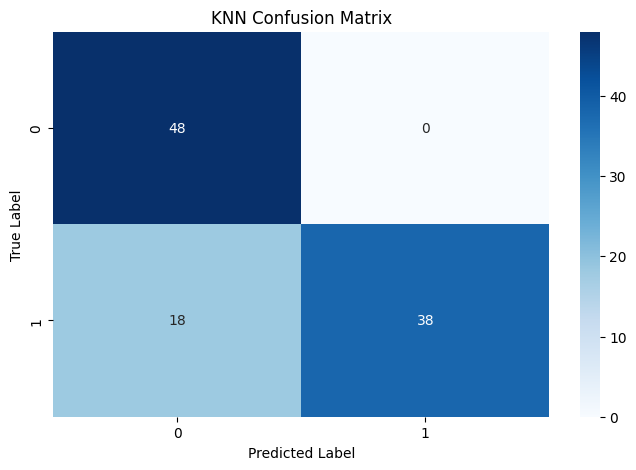

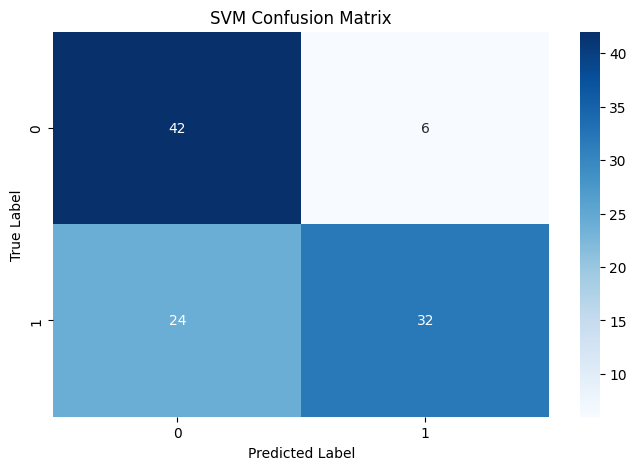

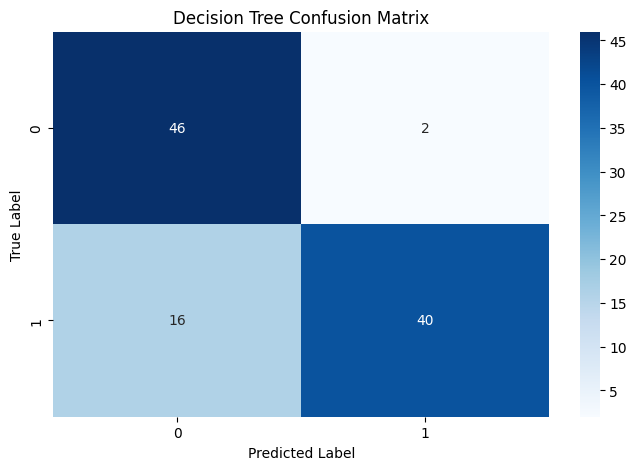

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



naive_bayes_pred = naive_bayes_classifier.predict(X_test)
knn_pred = knn_grid_search.best_estimator_.predict(X_test)
svm_pred = best_svm_model.predict(X_test)
decision_tree_pred = best_decision_tree_model.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test, naive_bayes_pred, "Naïve Bayes Confusion Matrix")
plot_confusion_matrix(y_test, knn_pred, "KNN Confusion Matrix")
plot_confusion_matrix(y_test, svm_pred, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, decision_tree_pred, "Decision Tree Confusion Matrix")



**ROC curve**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


nb_probs = best_naive_bayes_classifier.predict_proba(X_test)[:, 1]
knn_probs = knn_grid_search.best_estimator_.predict_proba(X_test)[:, 1]
svm_scores = best_svm_model.decision_function(X_test)
svm_probs = 1 / (1 + np.exp(-svm_scores))
dt_probs = best_decision_tree_model.predict_proba(X_test)[:, 1]


nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_roc_auc = auc(nb_fpr, nb_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_roc_auc = auc(knn_fpr, knn_tpr)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_roc_auc = auc(svm_fpr, svm_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_roc_auc = auc(dt_fpr, dt_tpr)


**ROC curve for Naive Bayes model**

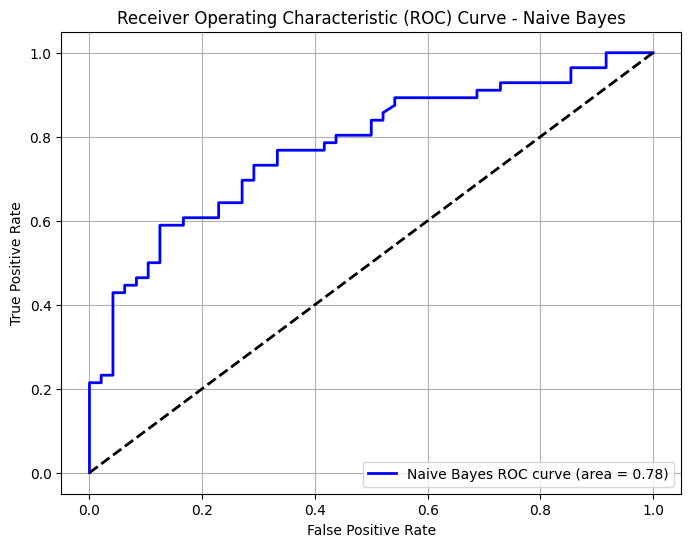

In [ ]:

# Plot ROC curve for Naive Bayes model
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, color='blue', lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**ROC curve for KNN model**

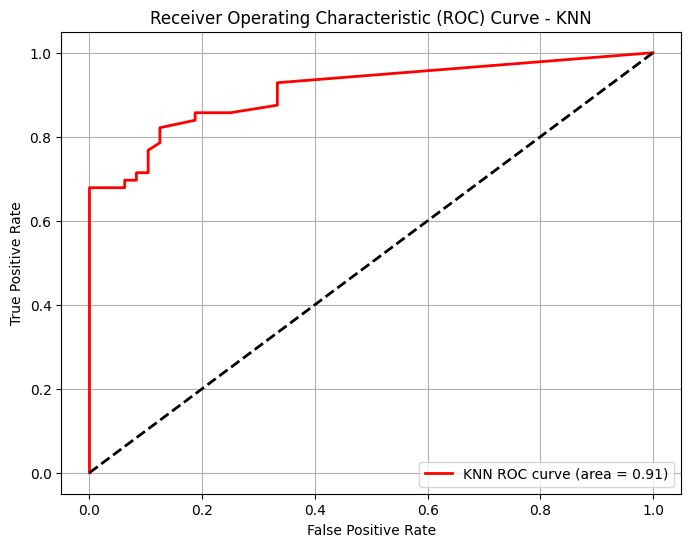

In [ ]:

# Plot ROC curve for KNN model
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='red', lw=2, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**ROC curve for SVM model**

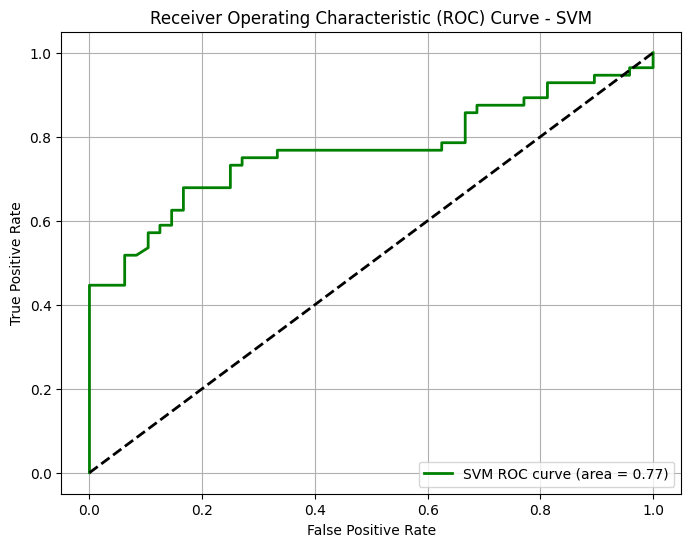

In [ ]:
# Plot ROC curve for SVM model
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label='SVM ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**ROC curve for Decision Tree model**

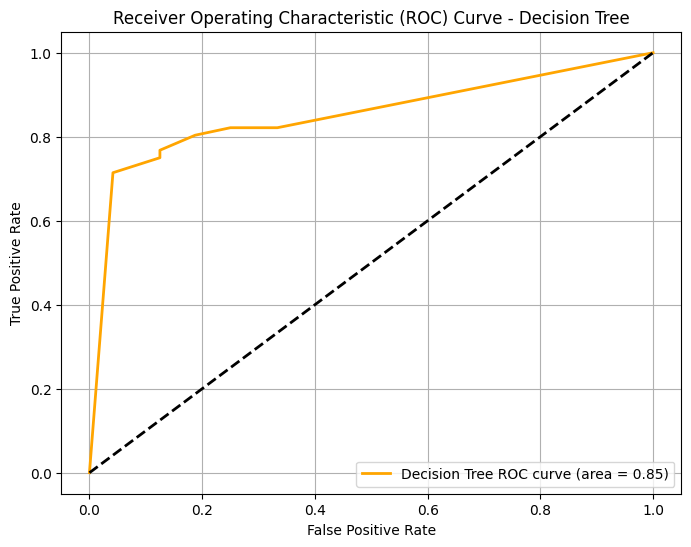

In [ ]:
# Plot ROC curve for Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, color='orange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Classification Report for Naïve Bayes Classifier**


In [ ]:


print(classification_report(y_test, naive_bayes_pred))

              precision    recall  f1-score   support

           0       0.65      0.88      0.74        48
           1       0.85      0.59      0.69        56

    accuracy                           0.72       104
   macro avg       0.75      0.73      0.72       104
weighted avg       0.75      0.72      0.72       104



**Classification Report for KNN Classifier**

In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        48
           1       1.00      0.68      0.81        56

    accuracy                           0.83       104
   macro avg       0.86      0.84      0.83       104
weighted avg       0.87      0.83      0.82       104



**Classification Report for SVM**

In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        48
           1       0.84      0.57      0.68        56

    accuracy                           0.71       104
   macro avg       0.74      0.72      0.71       104
weighted avg       0.75      0.71      0.71       104



**Classification Report for Decision Tree Classifier**

In [ ]:


decision_tree_classification_report = classification_report(y_test, decision_tree_pred)
print("\nClassification Report for Decision Tree Classifier:")
print(decision_tree_classification_report)



Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.74      0.96      0.84        48
           1       0.95      0.71      0.82        56

    accuracy                           0.83       104
   macro avg       0.85      0.84      0.83       104
weighted avg       0.86      0.83      0.83       104



# MLP

In [23]:


X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [24]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)


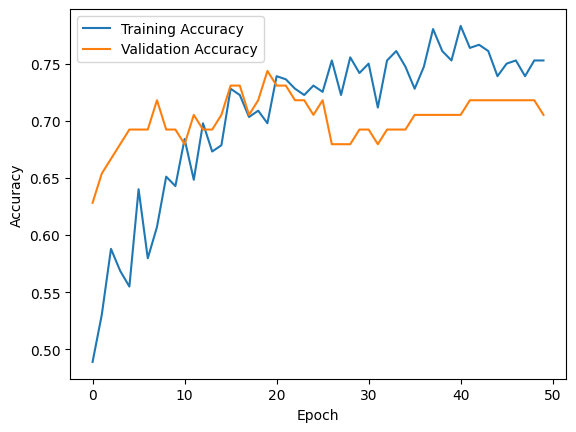

In [25]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7051281929016113


# Hyperparameter Tuning


In [27]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128,), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64)}
Best Score: 0.8132366887955561


**Accuracy of Best Hyper parameters**

In [29]:

best_model = MLPClassifier(random_state=42, **best_params)


best_model.fit(X_train, y_train)


test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with Best Parameters:", test_accuracy)

Test Accuracy with Best Parameters: 0.7564102564102564


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Confusion Matrix**

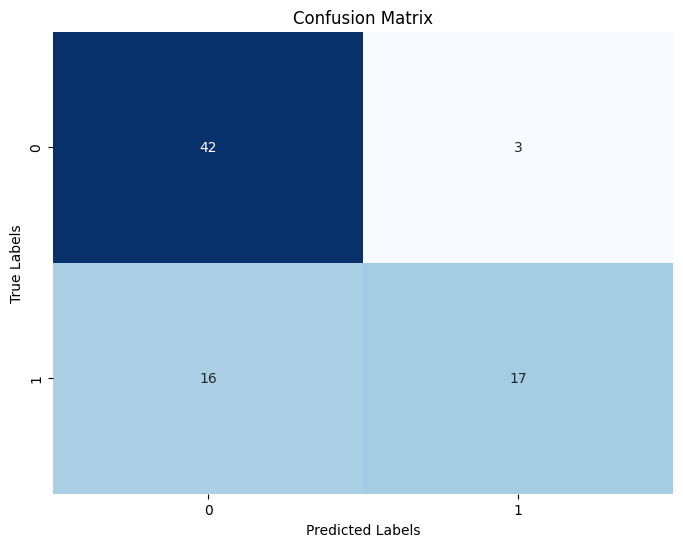

In [30]:

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**ROC Curve**

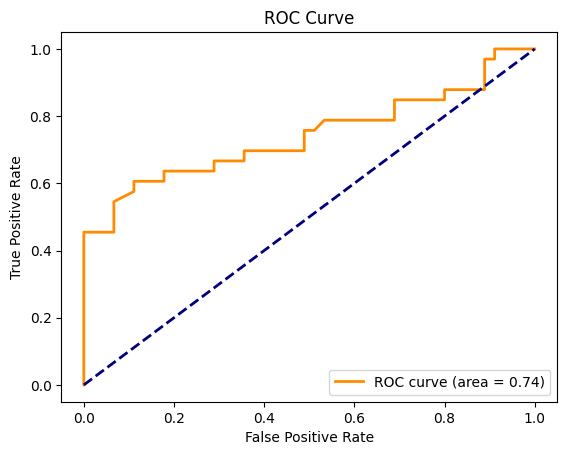

In [31]:


y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Classification Report for MLP**

In [32]:
from sklearn.metrics import classification_report


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

Classification Report:
              precision    recall  f1-score   support

      Benign       0.72      0.93      0.82        45
   Malignant       0.85      0.52      0.64        33

    accuracy                           0.76        78
   macro avg       0.79      0.72      0.73        78
weighted avg       0.78      0.76      0.74        78

